<a href="https://colab.research.google.com/github/pknemi/Datacleaning/blob/main/car_prices_datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data cleaning,outlier detection and visualization of the dataset carprices.**

In this task, we'll perform data cleaning, outlier detection, and visualization on a car prices dataset using pandas. The dataset includes columns such as Selling Price, Market Price, Model, Odometer, Condition, and other attributes related to various car brands. The goal is to ensure data quality by identifying and handling missing values, detecting outliers in key numerical fields like price and odometer readings, and visualizing patterns and distributions to gain insights into the factors affecting car prices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings


In [2]:
data=pd.read_csv('car_prices.csv')
data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79947,2012,Hyundai,Veloster,Base,Hatchback,automatic,kmhtc6ad2cu037410,fl,43.0,33267.0,blue,gray,hyundai motor finance,11850,12100,Tue Jan 06 2015 01:30:00 GMT-0800 (PST)
79948,2012,Infiniti,G Sedan,G25,G Sedan,automatic,jn1dv6ap5cm810600,fl,41.0,37855.0,white,black,nissan infiniti lt,17000,18400,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
79949,2012,Infiniti,M,M37,Sedan,automatic,jn1by1ap7cm331807,fl,48.0,45475.0,black,black,nissan infiniti lt,24300,25000,Tue Jan 06 2015 13:00:00 GMT-0800 (PST)
79950,2012,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,jn1cv6ap1cm936352,tx,37.0,29499.0,gray,black,nissan infiniti lt,21400,22400,Wed Jan 07 2015 10:30:00 GMT-0800 (PST)


**Displaying the basic information of the dataset**


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79952 entries, 0 to 79951
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          79952 non-null  int64  
 1   make          79623 non-null  object 
 2   model         79605 non-null  object 
 3   trim          79391 non-null  object 
 4   body          77634 non-null  object 
 5   transmission  70156 non-null  object 
 6   vin           79952 non-null  object 
 7   state         79952 non-null  object 
 8   condition     68160 non-null  float64
 9   odometer      79877 non-null  float64
 10  color         79784 non-null  object 
 11  interior      79784 non-null  object 
 12  seller        79952 non-null  object 
 13  mmr           79952 non-null  int64  
 14  sellingprice  79952 non-null  int64  
 15  saledate      79952 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 9.8+ MB


In [ ]:
data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

**Display the count of missing values in each column**

In [ ]:
# Display the count of missing values in each column
data.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


**Count missing values in each row**


In [ ]:
missing_count = data.isnull().sum(axis=1)



**Listwise deletion for rows that have at least 4 missing values.**

In [ ]:
# Keep only rows with less than 4 missing values
data_clean = data[missing_count < 4].copy()


**Imputation with mean and median numerical fields.**

In [ ]:
data["condition"].mean()

29.72958318457694

In [ ]:
data['condition'].median()

34.0

<Axes: ylabel='condition'>

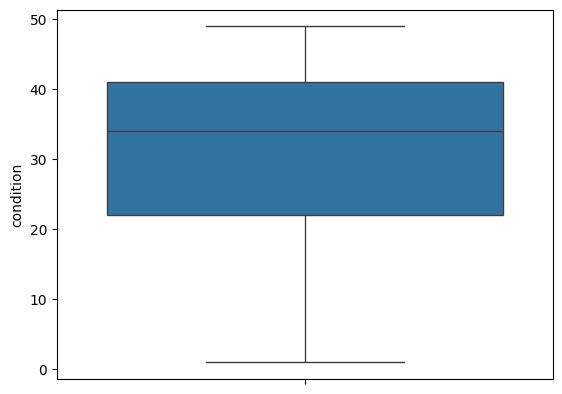

In [ ]:
sns.boxplot(data_clean["condition"])

Analysing the boxplot for the condition variable shows no outliers, indicating a normal distribution. Therefore, imputing missing values with the mean is appropriate, as it maintains the data's central tendency without introducing bias.

In [ ]:
# Mean imputation for condition
data_clean["condition"] = data_clean['condition'].fillna(data_clean['condition'].mean())


In [ ]:
data["odometer"].mean()

68320.01776666554

In [ ]:
data["odometer"].median()

52254.0

<Axes: ylabel='odometer'>

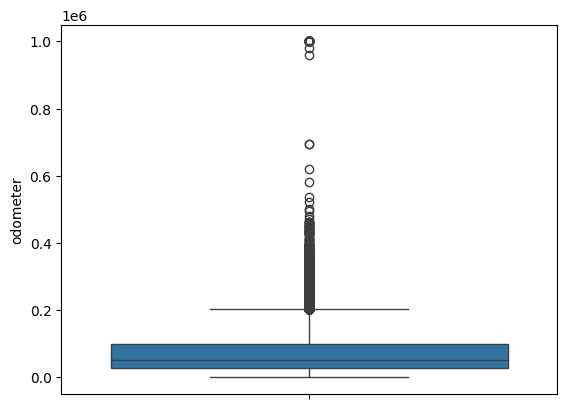

In [ ]:
sns.boxplot(data_clean["odometer"])

The boxplot for the odometer shows many outliers. To address this, we use winsorizing,which caps the outliers to the nearest percentile, such as the 5th and 95th percentiles, thereby reducing the impact of outliers while maintaining the integrity of the data distribution.

**Applying winsorizing method to treat the outliers and imputing with mean.**

In [ ]:
from scipy.stats.mstats import winsorize
data_clean["odometer"] = winsorize(data_clean["odometer"], limits=[0.05, 0.05])

<Axes: ylabel='odometer'>

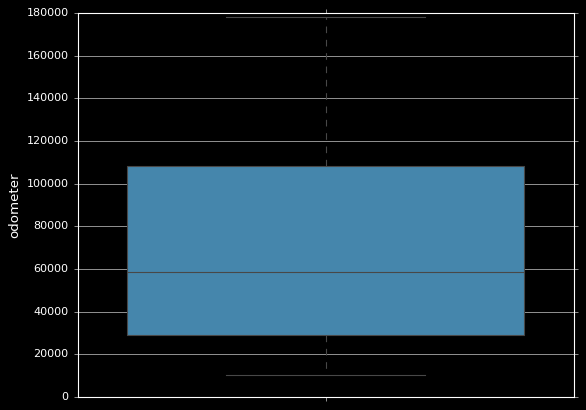

In [ ]:
sns.boxplot(data_clean["odometer"])

In [ ]:
#mean imputation for odometer
data_clean["odometer"]=data_clean["odometer"].fillna(data_clean["odometer"].mean())

# **Mode Imputation: Filling Null Values in Categorical Data Using the Most Frequent Value.**
Mode imputation involves replacing missing values in categorical variables with the most frequent value (mode). This approach preserves the data's distribution and consistency, ensuring that the imputation maintains the integrity of the categorical variable.

In [ ]:
# Mode imputation for Make
data_clean['make'].mode()
data_clean['make'] = data_clean['make'].fillna(data_clean['make'].mode())

In [ ]:
#mode imputation for model
data_clean["model"]=data_clean["model"].fillna(data_clean["model"].mode()[0])

In [ ]:
#mode imputation for body
data_clean["body"].mode()
data_clean["body"]=data_clean["body"].fillna(data_clean["body"].mode()[0])

In [ ]:
#mode imputation for transmission
data_clean["transmission"].mode()
data_clean["transmission"]=data_clean["transmission"].fillna(data_clean["transmission"].mode()[0])

In [ ]:
#mode imputation for color
data_clean["color"].mode()
data_clean["color"]=data_clean["color"].fillna(data_clean["color"].mode()[0])

In [ ]:
#mode imputation for interior
data_clean["interior"].mode()
data_clean["interior"]=data_clean["interior"].fillna(data_clean["interior"].mode()[0])

In [ ]:
data_clean.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


In [ ]:
data_clean.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# **visualizing the cleaned data**

In [ ]:
filtsedan=data_clean[data_clean['body']=="SUV"]
sedan_group=filtsedan["make"].value_counts().head(10)
sedan_group

,count
make,
Ford,7428
Jeep,4008
Chevrolet,3907
Nissan,3120
Toyota,2126
GMC,1867
Dodge,1656
Honda,1609
Kia,1241


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ford'),
  Text(1, 0, 'Jeep'),
  Text(2, 0, 'Chevrolet'),
  Text(3, 0, 'Nissan'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'GMC'),
  Text(6, 0, 'Dodge'),
  Text(7, 0, 'Honda'),
  Text(8, 0, 'Kia'),
  Text(9, 0, 'BMW')])

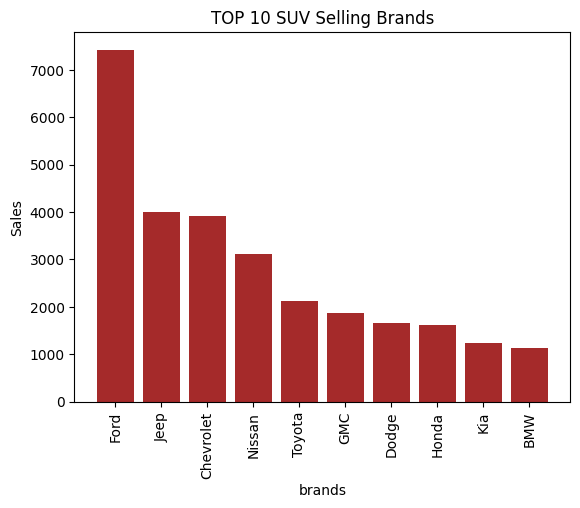

In [ ]:
plt.bar(sedan_group.index,sedan_group.values,color="brown")
plt.title("TOP 10 SUV Selling Brands")
plt.xlabel("brands")
plt.ylabel("Sales")
plt.xticks(rotation=90)

Insight:Among top 10 SUV  selling brands, Ford is the most selling brand followed by jeep.

Text(0.5, 1.0, 'TOP 5 BRANDS WITH BEST CONDITION')

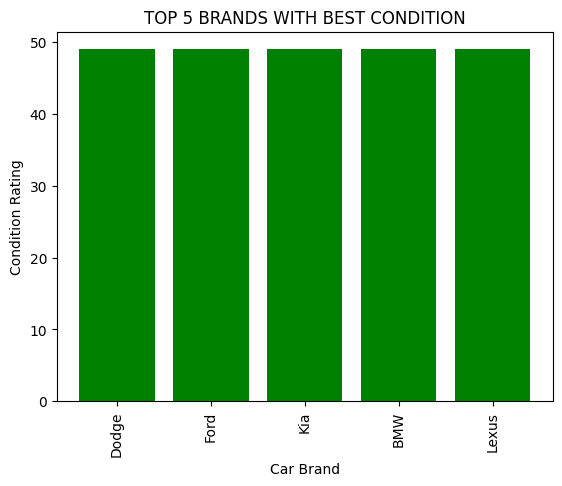

In [ ]:
condition_vehicles=data_clean.sort_values(by="condition",ascending=False).head(10)
condition_vehicles_name=condition_vehicles["make"].head(10)
Top_condition_vehicles=condition_vehicles["condition"]
plt.bar(condition_vehicles_name,Top_condition_vehicles,color="green")
plt.xticks(rotation=90)
plt.xlabel("Car Brand")
plt.ylabel("Condition Rating")
plt.title("TOP 5 BRANDS WITH BEST CONDITION")

insight:Top 5 brands with best condition

In [ ]:
gear_group=data_clean["transmission"].value_counts().head(10)
gear_group

,count
transmission,
automatic,140249
manual,4836


Text(0.5, 1.0, 'Transmission distribution')

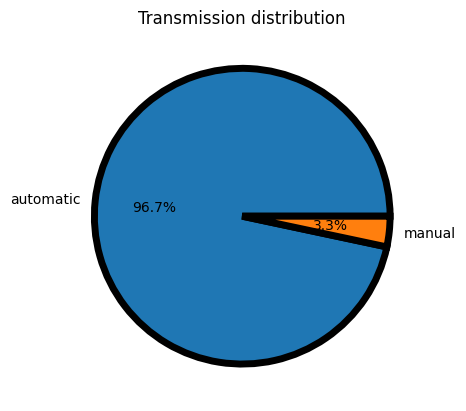

In [ ]:
wedgeprops={"edgecolor":"black","linewidth":5}
plt.pie(gear_group,labels=gear_group.index,wedgeprops=wedgeprops,autopct="%1.1f%%")
plt.title("Transmission distribution")

Insight:96.7% of the cars are automatic.

In [ ]:
high_mmr=data_clean.groupby("make")["mmr"].sum().sort_values(ascending=False).head(10)

Text(0, 0.5, 'marketing price')

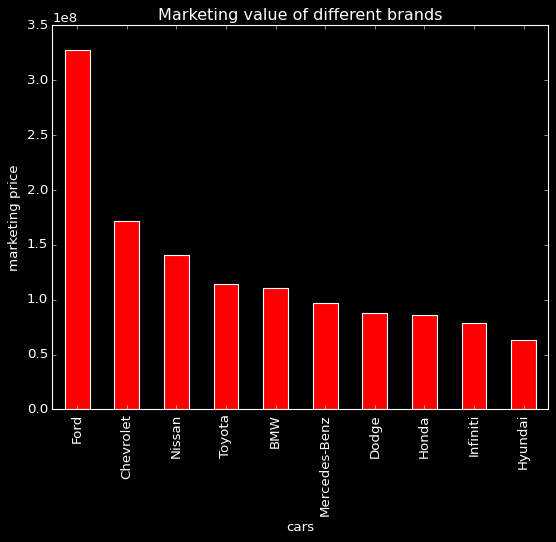

In [ ]:
plt.style.use("dark_background")
high_mmr.plot(kind="bar",x=high_mmr.index,y=high_mmr.values,color="red")
plt.title("Marketing value of different brands")
plt.xlabel("cars")
plt.ylabel("marketing price")

Insight:Analysing the different brands with marketing value, ford is the one with highest marketing value is ford followed by chevrolet.

In [ ]:
kia_cars=data_clean[data_clean["make"]=="kia"]
gpc=kia_cars.groupby([ 'model'])['sellingprice'].mean()
gpc

,sellingprice
model,
borrego,9000.000000
optima,2600.000000
rio,4666.666667
sportage,2900.000000


Text(0, 0.5, 'sellingprice')

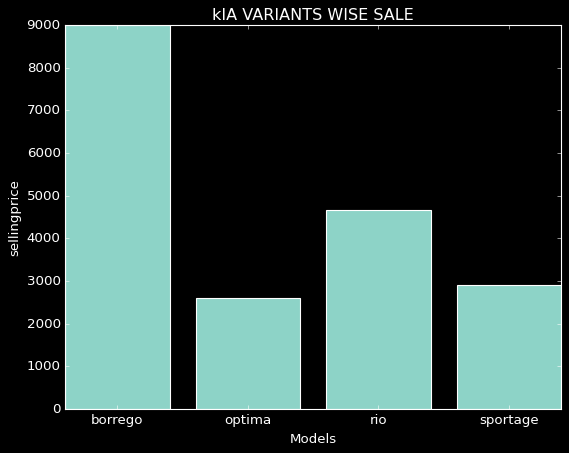

In [ ]:
plt.bar(gpc.index,gpc.values)
plt.title("kIA VARIANTS WISE SALE")
plt.xlabel("Models")
plt.ylabel("sellingprice")

INSIGHT-Among the variants of KIA,borrego has the maximum selling price



In [ ]:
high_selling_price=data_clean.sort_values(by="sellingprice",ascending=False).head(10)

Text(0, 0.5, 'selling price')

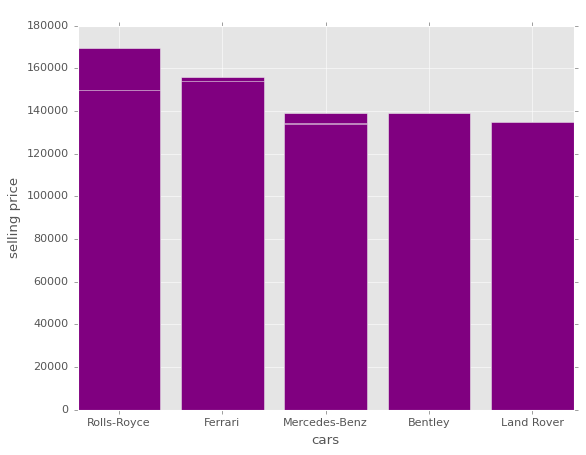

In [ ]:
plt.style.use("ggplot")
plt.bar(high_selling_price["make"],high_selling_price["sellingprice"],color="purple")
plt.title("Cars with high selling price")
plt.xlabel("cars")
plt.ylabel("selling price")

INSIGHT-Rolls-Royce having the highest selling price followed by Ferrari.

Text(0.5, 0, 'brands')

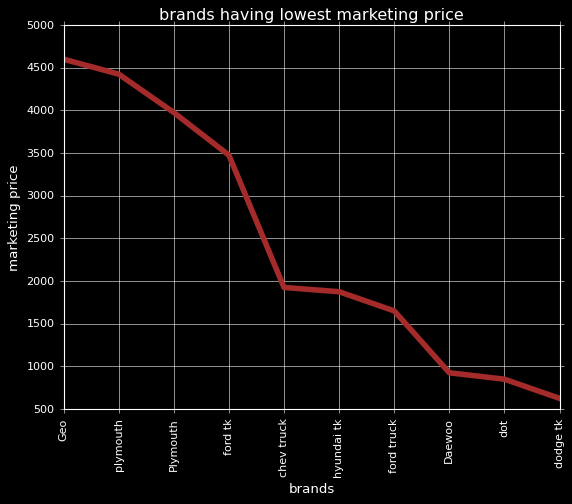

In [ ]:
low_mmr=data_clean.groupby("make")["mmr"].sum().sort_values(ascending=False).tail(10)
plt.style.use("dark_background")
low_mmr.plot(kind="line",x=low_mmr.index,y=low_mmr.values,color="brown",lw=5)
plt.xticks(rotation=90)
plt.title("brands having lowest marketing price")
plt.ylabel("marketing price")
plt.xlabel("brands")

INSIGHT:dodge tk is the one with lowest marketing price succeeded by dot.